In [3]:
#importamos librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import re
#cargamos y leemos el archivo csv como DataFrame
data_location = 'properatti.csv'

data = pd.read_csv('properatti.csv', encoding='latin1', dtype= str, sep=",")
# Mostramos los 5 primeros registros del df
data.head()


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.6618237,...,40.0,1127.2727272727273,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.9038831,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.6522615,...,55.0,1309.090909090909,1309.090909090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647796899999996,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,"-38.0026256,-57.5494468",-38.0026256,...,35.0,1828.571428571429,1828.571428571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [4]:
#analizamos el tipo de datos de cada columna
data.dtypes

Unnamed: 0                    object
operation                     object
property_type                 object
place_name                    object
place_with_parent_names       object
country_name                  object
state_name                    object
geonames_id                   object
lat-lon                       object
lat                           object
lon                           object
price                         object
currency                      object
price_aprox_local_currency    object
price_aprox_usd               object
surface_total_in_m2           object
surface_covered_in_m2         object
price_usd_per_m2              object
price_per_m2                  object
floor                         object
rooms                         object
expenses                      object
properati_url                 object
description                   object
title                         object
image_thumbnail               object
dtype: object

In [5]:
# Contabilizamos los registros del df
data.shape

(121220, 26)

In [6]:
# Describimos los registros del df
data.describe()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
count,121220,121220,121220,121197,121220,121220,121220,102503,69670,69670,...,101313,68617,87658,7899,47390,14262,121220,121218,121220,118108
unique,121220,1,4,1060,1164,1,28,646,47203,46495,...,995,25569,25185,182,31,982,121220,104055,72705,114389
top,113653,sell,apartment,CÃ³rdoba,|Argentina|Santa Fe|Rosario|,Argentina,Capital Federal,3838574.0,"-34.4026444,-58.6684776",-34.40264439999999,...,40.0,2000.0,2000.0,1.0,3.0,1.0,http://www.properati.com.ar/1axbg_venta_depart...,AVISO LEGAL: Las descripciones arquitectÃ³nica...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/yyMiu8BHQI9KXC...
freq,1,121220,71065,9254,8504,121220,32316,8504,312,312,...,2736,574,892,2080,12567,1028,1,358,4855,255


In [7]:
# Evaluamos el porcentaje de datos nulos por columna
def describe_data(cols: list, data: pd.DataFrame) -> pd.DataFrame:
    
    diccionario = {
        'Null': data.shape[0] - data.count(), 
        '% Null': round((data.shape[0] - data.count()) / data.shape[0] * 100, 3),
        'Types': data.dtypes
    }    
    return pd.DataFrame(index=cols, data=diccionario)

dataset=describe_data(cols=data.columns,data=data)
dataset

,Null,% Null,Types
Unnamed: 0,0,0.000,object
operation,0,0.000,object
property_type,0,0.000,object
place_name,23,0.019,object
place_with_parent_names,0,0.000,object
country_name,0,0.000,object
state_name,0,0.000,object
geonames_id,18717,15.441,object
lat-lon,51550,42.526,object
lat,51550,42.526,object


In [8]:
#modificamos los tipos de datos según la variable 

data['operation'] = data['operation'].astype(str)
data['price_aprox_local_currency'] = data['price_aprox_local_currency'].astype(float)
data['property_type'] = data['property_type'].astype(str)
data['place_name'] = data['place_name'].astype(str)
data['place_with_parent_names'] = data['place_with_parent_names'].astype(str)
data['state_name'] = data['state_name'].astype(str)
data['geonames_id'] = data['geonames_id'].astype(float)
data['lat'] = data['lat'].astype(float)
data['lon']= data['lon'].astype(float)
data['price'] = data['price'].astype(float)
data['currency'] = data['currency'].astype(str) 
data['price_aprox_local_currency'] = data['price_aprox_local_currency'].astype(float) 
data['price_aprox_usd'] = data['price_aprox_usd'].astype(float)
data['surface_total_in_m2'] = data['surface_total_in_m2'].astype(float)
data['surface_covered_in_m2'] = data['surface_covered_in_m2'].astype(float)
data['price_usd_per_m2'] = data['price_usd_per_m2'].astype(float)
data['price_per_m2'] = data['price_per_m2'].astype(float)
data['properati_url'] = data['properati_url'].astype(str)
data['description'] = data['description'].astype(str)
data['title'] = data['title'].astype(str)
data['rooms'] = data['rooms'].astype(float)


In [9]:
#chequeamos el cambio de tipo de datos
data.dtypes

Unnamed: 0                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                          object
rooms                         float64
expenses                       object
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [10]:
# La columna "unnamed :0" no brinda mayor información dado que es una columa de números secuenciales
data['Unnamed: 0'].unique()
len(data['Unnamed: 0']) == data.shape[0]

True

In [11]:
#El ejercicio se efectuará sobre los precios de las propiedades en venta (no incluye precios de alquileres)
data.operation.unique()

array(['sell'], dtype=object)

In [12]:
#Se descartaron aquellas variables que no consideramos relevantes ofueron redundantes para el objetivo (“country name”, “image_thumbnall”) y de aquellas que contenían más del 50% de datos nulos (“expenses”, ”floor”) con excepción de la columna ‘rooms’ que es crítica al momento de pricear una propiedad y para la cual se aplicó una estrategia para lidiar con la falta de datos 
data.drop(['expenses', 'image_thumbnail', 'Unnamed: 0','country_name', 'floor', 'operation'], axis=1, inplace=True)

<Figure size 720x432 with 0 Axes>

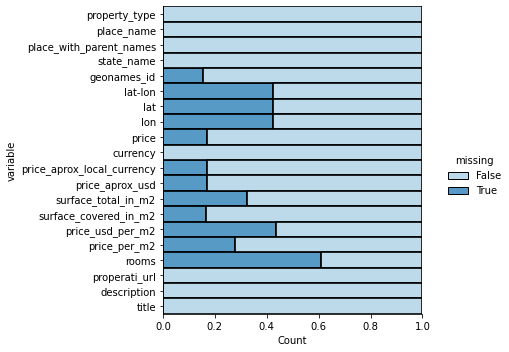

In [13]:
#Graficamos la proporcion de datos nulos en las columnas
plt.figure(figsize=(10,6))
sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25, palette='Paired')

In [14]:
# Chequeamos que no existen registros duplicados tomando como base la columna properati_url
data_duplicada = data.properati_url.duplicated(keep = False)
any(data_duplicada)

False

<AxesSubplot:xlabel='property_type', ylabel='Count'>

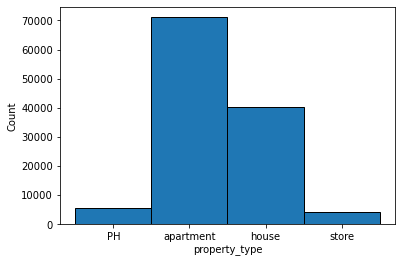

In [15]:
# Observamos mayor presencia relativa de departamentos y casas en venta en relación con PH´s y tiendas
sns.histplot(data.property_type, bins=20, alpha=1, edgecolor = 'black',  linewidth=1)

COMPLETAMOS DATOS FALTANTES 

In [16]:
# Imputación de la variable 'Rooms' definiendo un patrón de búsqueda para encontrar la cantidad de ambientes 
pat_rooms_a = '(?i)((?P<u>((mono)|(1)))|(?P<d>dos)|(?P<t>tres)|(?P<c>cuatro)|(?P<ci>cinco)|(?P<s>seis)|(?P<si>siete)|(?P<o>ocho)|(?P<n>nueve))\s?((amb)|(dor))'
reg_rooms_a = re.compile(pat_rooms_a)


In [17]:
def rooms_a(x):
    
    match = reg_rooms_a.search(x)
    
    if match is not None:
        group = match.group('u','d','t','c','ci','s','si','o','n')        
        for i in range(len(group)):            
            if group[i] is None:
                continue
            else:
                return float(i+1)
        return None

In [18]:
def parse_rooms(row, parse_from_column, parsed_column, recursive = False):
    
    if not np.isnan(row[parsed_column]):
        return row[parsed_column]
    
    lower_text = row[parse_from_column].lower()
    
    # regex
    regex_0 = re.search(r'((monoamb|monoambiente))', lower_text) # 'monoamb'
    regex_1 = re.search(r'(\d+)(\s)(\b(amb))', lower_text) # '2 amb'
    regex_2 = re.search(r'((\b(amb))(\D)(\d+))', lower_text) # ' amb:2'
    regex_3 = re.search(r'(\d+)((amb)\b)', lower_text) # ' 3amb'
    regex_4 = re.search(r'(\b(dos))(\s)(\b(amb))', lower_text) # 'dos ambientes'
    regex_5 = re.search(r'(\b(tres))(\s)(\b(amb))', lower_text) # 'tres ambientes'
    regex_6 = re.search(r'(\b(cuatro))(\s)(\b(amb))', lower_text) # 'cuatro ambientes'
    regex_7 = re.search(r'(\b(cinco))(\s)(\b(amb))', lower_text) # 'cinco ambientes'
    regex_8 = re.search(r'(\b(seis))(\s)(\b(amb))', lower_text) # 'seis ambientes'
    regex_9 = re.search(r'(\b(siete))(\s)(\b(amb))', lower_text) # 'siete ambientes'
    
    parse_digits = lambda x: re.search(r'(\d+)', x)
    
    if regex_0:
        return 1
    
    if regex_1:
        result = parse_digits(regex_1.group(1))
        if result:
            return int(result.group(1))
        
    if regex_2:
        result = parse_digits(regex_2.group(1))
        if result:
            return int(result.group(1))
        
    if regex_3:
        result = parse_digits(regex_3.group(1))
        if result:
            return int(result.group(1))
    
    if regex_4:
        return 2
    
    if regex_5:
        return 3
    
    if regex_6:
        return 4
    
    if regex_7:
        return 5
    
    if regex_8:
        return 6
    
    if regex_9:
        return 7
    
    result = rooms_a(lower_text)
    if result:
        return result
    
    # recursive call - parsing title.
    if not recursive:
        return parse_rooms(row, 'title', 'rooms', True)
        
    return result if result is not None else np.nan

In [19]:
data['rooms'] = data.apply(parse_rooms, args=['description', 'rooms'], axis=1)

In [20]:
describe_data(data.columns, data).loc['rooms']

Null        32912
% Null     27.151
Types     float64
Name: rooms, dtype: object

ANÁLISIS DE OUTLIERS

<AxesSubplot:xlabel='rooms', ylabel='Count'>

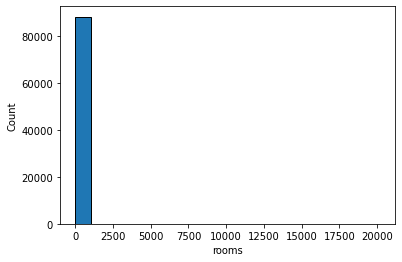

In [21]:
#Observamos la distribución de los datos sobre ambientes y notamos que la limpieza previa permitió eliminar outliers
sns.histplot(data.rooms.astype(float), bins=20
             , alpha=1, edgecolor = 'black',  linewidth=1)

Completamos datos de la columna precio por metro cuadrado con datos existentes

In [22]:
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms',
       'properati_url', 'description', 'title'],
      dtype='object')

In [23]:
price_aprox_usd_null_mask = data.price_aprox_usd.isnull()
price_aprox_usd_null = data.price_aprox_usd[price_aprox_usd_null_mask ]
print("La cantidad de registros vacios en la columna price_aprox_usd es: " + str(len(price_aprox_usd_null)))

La cantidad de registros vacios en la columna price_aprox_usd es: 20410


In [24]:
surface_total_in_m2_null_mask = data.surface_total_in_m2.isnull()
surface_total_in_m2_null = data.surface_total_in_m2[surface_total_in_m2_null_mask]
print("La cantidad de registros vacios en la columna surface_total_in_m2 es: " + str(len(surface_total_in_m2_null)))

La cantidad de registros vacios en la columna surface_total_in_m2 es: 39328


In [25]:
price_usd_per_m2_null_mask = data.price_usd_per_m2.isnull()
price_usd_per_m2_null = data.price_usd_per_m2 [price_usd_per_m2_null_mask]
print("La cantidad de registros vacios en la columna price_usd_per_m2 es: " + str(len(price_usd_per_m2_null)))

La cantidad de registros vacios en la columna price_usd_per_m2 es: 52603


In [26]:
#Busco valores de superficie sin nulls
surface_total_in_m2_notnull_mask = data.surface_total_in_m2.notnull()
surface_total_in_m2_notnull = data.surface_total_in_m2[surface_total_in_m2_notnull_mask] #Eliminmar el tonumeric cuando compilemos
#surface_total_in_m2_notnull


In [27]:
#Uso los indices de los campos que no tienen nulls para encontrar los campos en precio
price_aprox_usd_aux = data.iloc[surface_total_in_m2_notnull.index, [11]]
price_aprox_usd_col = price_aprox_usd_aux.price_aprox_usd
#price_aprox_usd_col

In [28]:
#Calculo precio por metro cuadrado para las filas donde el valor de la columna orginal es null
price_usd_per_m2_aux = price_aprox_usd_col.div(surface_total_in_m2_notnull)
price_usd_per_m2_aux = price_usd_per_m2_aux.dropna() #Elimino NaN
price_usd_per_m2_aux[price_usd_per_m2_aux>0] #Dejo valores mayores a 0
price_usd_per_m2_aux= pd.DataFrame(price_usd_per_m2_aux, columns=['price_usd_per_m2_aux'])
#price_usd_per_m2_aux

In [29]:
#Reemplazo los nulls de price_usd_per_m2 con los valores de la columna auxiliar
data["price_usd_per_m2"].fillna(price_usd_per_m2_aux["price_usd_per_m2_aux"], inplace = True)

In [30]:
price_usd_per_m2_null_mask = data.price_usd_per_m2.isnull()
price_usd_per_m2_null = data.price_usd_per_m2 [price_usd_per_m2_null_mask]
print("La cantidad de registros vacios en la columna price_usd_per_m2 es: " + str(len(price_usd_per_m2_null)))

La cantidad de registros vacios en la columna price_usd_per_m2 es: 52354


In [31]:
dataset=describe_data(cols=data.columns,data=data)
dataset

,Null,% Null,Types
property_type,0,0.000,object
place_name,0,0.000,object
place_with_parent_names,0,0.000,object
state_name,0,0.000,object
geonames_id,18717,15.441,float64
lat-lon,51550,42.526,object
lat,51550,42.526,float64
lon,51550,42.526,float64
price,20410,16.837,float64
currency,0,0.000,object


Completamos datos de las columnas lat y lon con datos del dataset AR.txt (https://download.geonames.org/export/dump/) 

In [32]:
#limpiamos y completamos datos de columnas lat-lon 
mask_lat_lon = data[['lat-lon', 'lat', 'lon']]
mask_lat_lon

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447
...,...,...,...
121215,NaN,NaN,NaN
121216,NaN,NaN,NaN
121217,"-34.5706388726,-58.4755963355",-34.570639,-58.475596
121218,NaN,NaN,NaN


In [33]:
#cantidad de nulos en ambas columnas
cant_nulos_por_campo_lato_lon = mask_lat_lon.apply(lambda x: x.isnull().sum(), axis=0)
print(cant_nulos_por_campo_lato_lon)

lat-lon    51550
lat        51550
lon        51550
dtype: int64


In [34]:
#porcentajes de nulos en las columas enunciadas abajo
nulos_lat_lon=(data['lat-lon'].isnull().sum()*100 / len(data))
nulos_lat=(data['lat'].isnull().sum()*100 / len(data))
nulos_lon=(data['lon'].isnull().sum()*100 / len(data))
print(nulos_lat_lon)
print(nulos_lat)
print(nulos_lon)

42.52598581092229
42.52598581092229
42.52598581092229


In [35]:
#porcentajes de valores no-nulos
nulos_lat_lon_not=(data['lat-lon'].notnull().sum()*100 / len(data))
nulos_lat_not=(data['lat'].notnull().sum()*100 / len(data))
nulos_lon_not=(data['lon'].notnull().sum()*100 / len(data))
print(nulos_lat_lon_not)
print(nulos_lat_not)
print(nulos_lon_not)

57.47401418907771
57.47401418907771
57.47401418907771


In [36]:
#tomamos unicamente los valores no nulos 
lat_lot_not_null = mask_lat_lon.loc[mask_lat_lon['lat-lon'].notnull()]
lat_lot_not_null.head()

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447


In [37]:
lat_lot_not_null['valor_lat_sin_lon'] = lat_lot_not_null['lat-lon'].apply(lambda x: x.split(',')[0])
lat_lot_not_null['valor_lon_sin_lat'] = lat_lot_not_null['lat-lon'].apply(lambda x: x.split(',')[1])
lat_lot_not_null.head()

C:\Users\fox00\AppData\Local\Temp\ipykernel_12400\678879428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lot_not_null['valor_lat_sin_lon'] = lat_lot_not_null['lat-lon'].apply(lambda x: x.split(',')[0])
C:\Users\fox00\AppData\Local\Temp\ipykernel_12400\678879428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lot_not_null['valor_lon_sin_lat'] = lat_lot_not_null['lat-lon'].apply(lambda x: x.split(',')[1])


,lat-lon,lat,lon,valor_lat_sin_lon,valor_lon_sin_lat
0,"-34.6618237,-58.5088387",-34.661824,-58.508839,-34.6618237,-58.5088387
1,"-34.9038831,-57.9643295",-34.903883,-57.964330,-34.9038831,-57.9643295
2,"-34.6522615,-58.5229825",-34.652262,-58.522982,-34.6522615,-58.5229825
3,"-34.6477969,-58.5164244",-34.647797,-58.516424,-34.6477969,-58.5164244
4,"-38.0026256,-57.5494468",-38.002626,-57.549447,-38.0026256,-57.5494468


In [38]:
data['lat'] = data['lat'].astype('float64')
data['lon'] = data['lon'].astype('float64')
describe_data(data.columns, data).loc[['lat', 'lon']]

,Null,% Null,Types
lat,51550,42.526,float64
lon,51550,42.526,float64


In [39]:
#tomo los nulos lat y lon y los no_nulos de geonames_id del dataset data
geo_colums = data[['geonames_id', 'lat', 'lon']]
geo_subset_null_mask = (data.loc[:,'geonames_id'].notnull()) & (data.loc[:,'lat'].isnull()) & (data.loc[:,'lon'].isnull())
geo_subset_null = geo_colums[geo_subset_null_mask]
describe_data(geo_subset_null.columns, geo_subset_null)
geo_subset_null.head()


,geonames_id,lat,lon
13,3430234.0,NaN,NaN
14,3430234.0,NaN,NaN
42,3429979.0,NaN,NaN
49,3434130.0,NaN,NaN
62,3436042.0,NaN,NaN


In [40]:
#los nombres de columnas se encuentran en el archivo readme.txt
geonames_columns = ['geonames_id', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 
                    'admin1_code', 'admin2_code', 'admin3_code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date']

geonames_data = pd.read_csv('AR.txt', delimiter='\t', names=geonames_columns)
geonames_data.set_index('geonames_id', inplace=True)
geonames_data.head()

,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4 code,population,elevation,dem,timezone,modification date
geonames_id,,,,,,,,,,,,,,,,,,
3427200,Sierra del 15,Sierra del 15,NaN,-37.96613,-57.94670,T,HLL,AR,NaN,1.0,6357.0,NaN,NaN,0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30
3427201,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,NaN,-28.63333,-56.11667,S,HSE,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,79,America/Argentina/Cordoba,2016-01-30
3427202,Cañada del Zorro,Canada del Zorro,NaN,-32.16667,-59.50000,H,STM,AR,NaN,8.0,NaN,NaN,NaN,0,NaN,65,America/Argentina/Cordoba,1993-12-21
3427203,Estancia Zorraquín,Estancia Zorraquin,NaN,-31.51553,-58.55208,S,RNCH,AR,NaN,8.0,30113.0,NaN,NaN,0,NaN,71,America/Argentina/Cordoba,2016-01-30
3427204,Estancia Zequeira Cué,Estancia Zequeira Cue,NaN,-28.43825,-56.08838,S,RNCH,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,98,America/Argentina/Cordoba,2016-01-30


In [41]:
#creo un diccionario tomando unicamente las key de los geonames_id y le asigno conforme su index la key de su coordenada (lat y/o lon)
geonames_lat_mapping_dict = { indx: geonames_data.loc[int(indx)].loc['latitude'] for indx in geo_subset_null['geonames_id'].unique().astype('float') if indx in geonames_data.index }
geonames_lon_mapping_dict = { indx: geonames_data.loc[int(indx)].loc['longitude'] for indx in geo_subset_null['geonames_id'].unique().astype('float') if indx in geonames_data.index }
#describe_data(data.columns, data)
#geonames_lon_mapping_dict

In [42]:
#ahora le asignamos su key por cada fila que tenga nulo , conforme a su correspondiente index 
data['lat'] = data.apply(lambda x: geonames_lat_mapping_dict.get(x['geonames_id'], np.nan) if np.isnan(x['lat']) else x['lat'], axis=1)
data['lon'] = data.apply(lambda x: geonames_lon_mapping_dict.get(x['geonames_id'], np.nan) if np.isnan(x['lon']) else x['lon'], axis=1)
#describe_data(data.columns, data)

In [43]:
describe_data(data.columns, data).loc[['lat', 'lon']]

,Null,% Null,Types
lat,8346,6.885,float64
lon,8346,6.885,float64


In [44]:
#agregar descripción
geonames_data.loc[ geonames_data['name'] == 'Pilar' ]

,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4 code,population,elevation,dem,timezone,modification date
geonames_id,,,,,,,,,,,,,,,,,,
3429980,Pilar,Pilar,Pilar,-34.45866,-58.91420,P,PPLA2,AR,NaN,1.0,6638.0,NaN,NaN,226517,NaN,27,America/Argentina/Buenos_Aires,2017-12-21
3480748,Pilar,Pilar,NaN,-34.43750,-58.90556,L,LCTY,AR,NaN,1.0,NaN,NaN,NaN,0,NaN,18,America/Argentina/Buenos_Aires,2013-08-08
3841149,Pilar,Pilar,Pilar,-31.67890,-63.87964,P,PPL,AR,NaN,5.0,14119.0,NaN,NaN,12488,NaN,334,America/Argentina/Cordoba,2016-01-30
3841150,Pilar,Pilar,NaN,-31.43937,-61.25884,P,PPL,AR,NaN,21.0,82070.0,NaN,NaN,0,NaN,62,America/Argentina/Cordoba,2016-01-30


In [45]:
#Calculo cuántos valores distintos tengo en la columna place_with_parent_names que incluye provincia y barrio.

data.place_with_parent_names.value_counts().head(3)

|Argentina|Santa Fe|Rosario|                               8504
|Argentina|CÃ³rdoba|CÃ³rdoba|                              6606
|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar del Plata|    6534
Name: place_with_parent_names, dtype: int64

In [46]:
#Hacemos el split de los valores que contiene la columna 'place_with_parents_name'.

splitted_locations = data.place_with_parent_names.str.split('|')
splitted_locations

0               [, Argentina, Capital Federal, Mataderos, ]
1         [, Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ]
2               [, Argentina, Capital Federal, Mataderos, ]
3                 [, Argentina, Capital Federal, Liniers, ]
4         [, Argentina, Buenos Aires Costa AtlÃ¡ntica, M...
                                ...                        
121215           [, Argentina, Capital Federal, Belgrano, ]
121216    [, Argentina, Bs.As. G.B.A. Zona Norte, San Is...
121217      [, Argentina, Capital Federal, Villa Urquiza, ]
121218    [, Argentina, Buenos Aires Costa AtlÃ¡ntica, M...
121219                     [, Argentina, Capital Federal, ]
Name: place_with_parent_names, Length: 121220, dtype: object

In [47]:
#como el tercer valor es capital federal se toma tercera posicion x[3] y el x[-2] del ultimo -2
data['ciudad'] = splitted_locations.apply(lambda x: x[3])
data['barrio'] = splitted_locations.apply(lambda x: x[-2])

In [48]:
data.barrio.value_counts()

CÃ³rdoba             9254
Rosario              8504
Mar del Plata        6534
Tigre                3324
Nordelta             3315
                     ... 
Barrio San Benito       1
San CristÃ³bal          1
Santa Teresa            1
Lago EpuyÃ©n            1
AluminÃ©                1
Name: barrio, Length: 1061, dtype: int64

In [49]:
#geonames_data.iloc[geonames_data.index== 3427200.0,: ]
geonames_data = pd.read_csv('AR.txt', delimiter='\t', names=geonames_columns)

In [50]:
#chequeamos que coincidan los registros de geoname entre los datasets.

caso_1 = geonames_data[geonames_data['geonames_id'] == 3430234.0]
print(caso_1.loc[:,[ "name", "latitude", "longitude"]])

caso_2 = data[data['geonames_id'] == 3430234.0].sample(1)
print(caso_2.loc[:,["geonames_id", "place_name", "lat", "lon"]])

         name  latitude  longitude
3024  Palermo -34.58856  -58.43053
       geonames_id place_name        lat        lon
38358    3430234.0    Palermo -34.596545 -58.419331


In [51]:
#Mergeamos los dataset por "geonames_id", asumiendo entonces que coinciden estos datos en ambos.

data = data.merge(geonames_data, how='left', on= 'geonames_id')
geonames_data.sample(3)

,geonames_id,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4 code,population,elevation,dem,timezone,modification date
34726,3857456,Almacén El Ojo de Agua,Almacen El Ojo de Agua,NaN,-38.36769,-61.40232,S,SHSE,AR,NaN,1.0,6196.0,NaN,NaN,0,NaN,263,America/Argentina/Buenos_Aires,2016-01-30
9123,3436351,Chacra Ancafilú,Chacra Ancafilu,NaN,-37.53426,-57.52668,S,HSE,AR,NaN,1.0,6518.0,NaN,NaN,0,NaN,23,America/Argentina/Buenos_Aires,2016-01-30
12932,3835585,Estancia Schomán,Estancia Schoman,NaN,-45.04720,-68.37875,S,RNCH,AR,NaN,4.0,26091.0,NaN,NaN,0,NaN,585,America/Argentina/Catamarca,2016-01-30


In [52]:
# Ahora vamos a imputar los datos faltantes de latitud y longitud, a partir de los geonames.

data['lat'] = data['lat'].fillna(data['latitude'])
data['lon'] = data['lon'].fillna(data['longitude'])

In [53]:
#Verificaremos entonces el porcentaje de nulos de ambas columnas, post imputación. Como vemos, se redujo de un 38% a un 7%.

print("Este es el porentaje de valores nulos de la columna latitud: {}".format(data['lat'].isnull().sum()*100 / len(data)))
print("Este es el porentaje de valores nulos de la columna longitud: {}".format(data['lon'].isnull().sum()*100 / len(data)))

Este es el porentaje de valores nulos de la columna latitud: 6.885002474839135
Este es el porentaje de valores nulos de la columna longitud: 6.885002474839135


In [54]:
dg = data.loc[:,['state_name', 'lat',"lon"]]
print(dg)

                           state_name        lat        lon
0                     Capital Federal -34.661824 -58.508839
1              Bs.As. G.B.A. Zona Sur -34.903883 -57.964330
2                     Capital Federal -34.652262 -58.522982
3                     Capital Federal -34.647797 -58.516424
4       Buenos Aires Costa AtlÃ¡ntica -38.002626 -57.549447
...                               ...        ...        ...
121215                Capital Federal -34.562700 -58.458290
121216       Bs.As. G.B.A. Zona Norte -34.463120 -58.534810
121217                Capital Federal -34.570639 -58.475596
121218  Buenos Aires Costa AtlÃ¡ntica        NaN        NaN
121219                Capital Federal -34.600000 -58.450000

[121220 rows x 3 columns]


In [55]:
#Agregamos la columna 'geometry'
geodg = gpd.GeoDataFrame(dg, geometry=gpd.points_from_xy(dg.lon, dg.lat))
print (geodg)

                           state_name        lat        lon  \
0                     Capital Federal -34.661824 -58.508839   
1              Bs.As. G.B.A. Zona Sur -34.903883 -57.964330   
2                     Capital Federal -34.652262 -58.522982   
3                     Capital Federal -34.647797 -58.516424   
4       Buenos Aires Costa AtlÃ¡ntica -38.002626 -57.549447   
...                               ...        ...        ...   
121215                Capital Federal -34.562700 -58.458290   
121216       Bs.As. G.B.A. Zona Norte -34.463120 -58.534810   
121217                Capital Federal -34.570639 -58.475596   
121218  Buenos Aires Costa AtlÃ¡ntica        NaN        NaN   
121219                Capital Federal -34.600000 -58.450000   

                           geometry  
0       POINT (-58.50884 -34.66182)  
1       POINT (-57.96433 -34.90388)  
2       POINT (-58.52298 -34.65226)  
3       POINT (-58.51642 -34.64780)  
4       POINT (-57.54945 -38.00263)  
...            

In [56]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geoarg = world[world.name=='Argentina']
print (geoarg)

    pop_est      continent       name iso_a3  gdp_md_est  \
9  44293293  South America  Argentina    ARG    879400.0   

                                            geometry  
9  MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  


In [57]:
#revistar gráfico mapa país
def to_chart(p_ciudad, p_pais):
    
    ax = p_pais.plot(figsize=(10,15), color='white', edgecolor='black')

    p_ciudad.plot(ax=ax, color='red', alpha= 0.4)


plt.show()

In [58]:
data.drop(['asciiname', 'alternatenames', 'feature_class', 'feature_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'population', 'dem', 'timezone', 'modification date', 'elevation', 'admin4 code', 'country_code', 'name','latitude','longitude', ],axis=1, inplace=True)

In [59]:
dataset=describe_data(cols=data.columns,data=data)
dataset

,Null,% Null,Types
property_type,0,0.000,object
place_name,0,0.000,object
place_with_parent_names,0,0.000,object
state_name,0,0.000,object
geonames_id,18717,15.441,float64
lat-lon,51550,42.526,object
lat,8346,6.885,float64
lon,8346,6.885,float64
price,20410,16.837,float64
currency,0,0.000,object


In [60]:
#Calculo el valor medio por barrio
Valor_medio = data.groupby(['state_name','barrio'])['price_usd_per_m2'].mean()
Valor_medio
pd.DataFrame(Valor_medio)


price_usd_per_m2
state_name               barrio                                   
Bs.As. G.B.A. Zona Norte                               2027.674620
                          Country Maschwitz Club       1369.986720
                          los alamos                   1600.000000
                         Acacias Blancas               1181.861023
                         Acassuso                      2062.722980
...                                                            ...
TucumÃ¡n                 TafÃ­ Viejo                    716.978807
                         TafÃ­ del Valle                569.477620
                         TucumÃ¡n                       636.118219
                         Villa Belgrano                        NaN
                         Yerba Buena                    958.932482

[1099 rows x 1 columns]

In [61]:
data = pd.merge(data, Valor_medio, how='left', on='state_name') #Creo una columna auxiliar en el dataframe con los datos nuevos


In [62]:
data.head(1)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2_x,price_per_m2,rooms,properati_url,description,title,ciudad,barrio,price_usd_per_m2_y
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.0,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,Mataderos,2057.529147


In [63]:
#Reemplazo los nulls de price_usd_per_m2 con los valores de la columna auxiliar
data["price_usd_per_m2_x"].fillna(data["price_usd_per_m2_y"], inplace = True)

data.rename(columns={"price_usd_per_m2_y": "price_usd_per_m2"},inplace = True)

data.head(5)
#cambiar nombre de la columna price_usd_per_m2_x a price_usd_per_m2 
#drop columnas price_usd_per_m2_y
#Despues dropear las tablas auxiliares

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2_x,price_per_m2,rooms,properati_url,description,title,ciudad,barrio,price_usd_per_m2
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.0,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,Mataderos,2057.529147
1,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.0,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,Mataderos,2088.124134
2,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.0,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,Mataderos,2749.102521
3,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.0,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,Mataderos,1982.249390
4,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.0,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,Mataderos,inf


In [64]:
dataset=describe_data(cols=data.columns,data=data)
dataset

,Null,% Null,Types
property_type,0,0.000,object
place_name,0,0.000,object
place_with_parent_names,0,0.000,object
state_name,0,0.000,object
geonames_id,3539201,24.355,float64
lat-lon,6959671,47.893,object
lat,1498324,10.311,float64
lon,1498324,10.311,float64
price,1855184,12.766,float64
currency,0,0.000,object


In [65]:
# Vemos la cantidad de registros que hay de cada provincia/localidad, agregando una columna "total por provincia".
grouped_by_state = data.groupby("state_name").size().reset_index(name="Total_por_provincia")
grouped_by_state
#Calculamos la frecuencia de cada provincia en proporción al total:
data_por_state = data["state_name"]
proportions = 100. * data_por_state.value_counts() / len(data_por_state)
proportions

Bs.As. G.B.A. Zona Norte         46.610772
Capital Federal                  13.787606
Bs.As. G.B.A. Zona Sur           11.809218
CÃ³rdoba                          9.384893
Buenos Aires Costa AtlÃ¡ntica     5.990448
Santa Fe                          5.319852
Bs.As. G.B.A. Zona Oeste          5.003608
Buenos Aires Interior             1.560773
Mendoza                           0.135902
RÃ­o Negro                        0.066722
Entre RÃ­os                       0.063481
Misiones                          0.057474
NeuquÃ©n                          0.050441
TucumÃ¡n                          0.046381
Chubut                            0.028517
San Luis                          0.024278
Corrientes                        0.024071
Salta                             0.017217
La Pampa                          0.009723
Chaco                             0.002746
San Juan                          0.002202
Catamarca                         0.001115
Santa Cruz                        0.000826
Tierra Del 

<AxesSubplot:xlabel='state_name', ylabel='Count'>

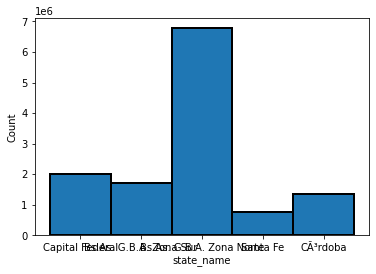

In [66]:
#armamos una máscara y reducimos el dataset quedandonos con datos de CABA, BA, Córdoba y Santa Fe
freq_mask = proportions > 5
final_states = proportions[freq_mask]
states_list = list(final_states.index)
mask_1 = data["state_name"] == 'Capital Federal'
mask_2 = data["state_name"] == 'Bs.As. G.B.A. Zona Norte'
mask_3 = data["state_name"] == 'Bs.As. G.B.A. Zona Sur'
mask_4 = data["state_name"] == 'Bs.As. G.B.A. Zona Oes'
mask_5 = data["state_name"] == 'Buenos Aires Costa Atlántica'
mask_6 = data["state_name"] == 'Santa Fe'
mask_7 = data["state_name"] == 'CÃ³rdoba'
state_mask = mask_1 | mask_2 | mask_3 | mask_4 | mask_5 | mask_6 | mask_7
filtered_data = data[state_mask]
filtered_data.columns
sns.histplot(filtered_data.state_name
             , bins=400, alpha=1, edgecolor = 'black',  linewidth=2)

In [67]:
filtered_data.shape
#filtered_data.head(1)

(12629957, 23)

In [68]:
#Evaluamos monedas aceptadas en la transacción 
#table_price = pd.pivot_table(filtered_data, index=['currency'], values=['price_aprox_local_currency'], aggfunc=['count'])
#table_price

In [69]:
#Eliminamos monedas que no utilizadas con frecuencia en relación al peso y al dólar
filtered_data.drop(filtered_data[filtered_data.currency=='PEN'].index, inplace=True)
filtered_data.currency

C:\Users\fox00\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0           USD
1           USD
2           USD
3           USD
4           USD
           ... 
14531829    USD
14531830    USD
14531831    USD
14531832    USD
14531833    USD
Name: currency, Length: 12629833, dtype: object

In [70]:
#filtered_data.columns

Vamos a evaluar los outliners

In [71]:
#dataset

In [72]:
#Se seleccionan las columnas que se van a analizar
new_data = data[['rooms','price','surface_total_in_m2','property_type','surface_covered_in_m2','price_usd_per_m2']]
new_data.head()

,rooms,price,surface_total_in_m2,property_type,surface_covered_in_m2,price_usd_per_m2
0,2.0,62000.0,55.0,PH,40.0,2057.529147
1,2.0,62000.0,55.0,PH,40.0,2088.124134
2,2.0,62000.0,55.0,PH,40.0,2749.102521
3,2.0,62000.0,55.0,PH,40.0,1982.249390
4,2.0,62000.0,55.0,PH,40.0,inf


Text(0.5, 8.95999999999998, 'Superficie total')

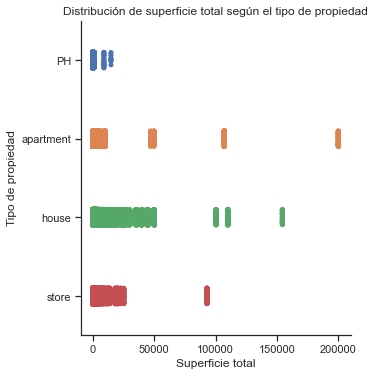

In [73]:
#Se grafica la distribución de la superficie total según los tipos de propiedades
sns.set_theme(style="ticks")
sns.catplot(data = new_data, x = "surface_total_in_m2", y = "property_type")
plt.title('Distribución de superficie total según el tipo de propiedad')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

Text(0.5, 0, 'Superficie total')

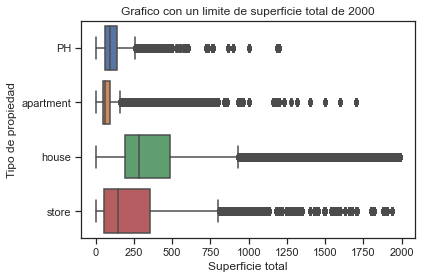

In [74]:
#Según el gráfico anterior se puede analizar que la concentración de los datos se encuentra dentro del primer cuadrante (20.000 de superficie total)
#Se grafican boxplots para analizar outliers
sns.boxplot(data = new_data[new_data['surface_total_in_m2'] < 2000], y = "property_type", x = "surface_total_in_m2")
plt.title('Grafico con un limite de superficie total de 2000')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

Text(0.5, 0, 'Superficie total')

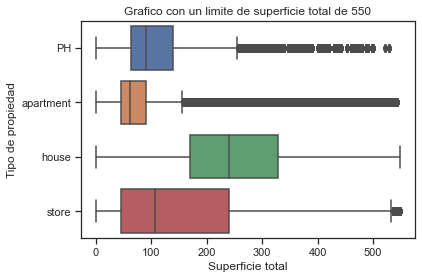

In [75]:
#Se puede analizar que la propiedad con mayor superficie total es Casa
sns.boxplot(data = new_data[new_data['surface_total_in_m2'] < 550], y = "property_type", x = "surface_total_in_m2")
plt.title('Grafico con un limite de superficie total de 550')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

In [76]:
# Se crean nuevos data set según el tipo de propiedad 
data_ph = new_data[new_data["property_type"].isin(['PH'])]
data_depto = new_data[new_data["property_type"].isin(['apartment'])]
data_casa = new_data[new_data["property_type"].isin(['house'])]
data_store = new_data[new_data["property_type"].isin(['store'])]

In [77]:
def get_iqr_values(datafr_indx, colmn_name):
    median = datafr_indx[colmn_name].median()
    q1 = datafr_indx[colmn_name].quantile(0.25) # 1st quartile
    q3 = datafr_indx[colmn_name].quantile(0.75) # 3rd quartile
    iqr = (q3-q1)*1.5 #Interquantile range
    minimum  = q1-iqr # The minimum value or the |- marker in the box plot
    maximum = q3+iqr # The maximum value or the -| marker in the box plot
    print("- Valor minimo:", minimum)
    print("- Valor maximo:", maximum)

In [78]:
#Se obtienen los valores maximos y medios de cada propiedad
print("Valores de tipo de propiedad PH:")
get_iqr_values(data_ph, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad Depto:")
get_iqr_values(data_depto, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad Casa:")
get_iqr_values(data_casa, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad Store:")
get_iqr_values(data_store, 'surface_total_in_m2')

Valores de tipo de propiedad PH:
- Valor minimo: -52.5
- Valor maximo: 255.5
----------------------------------
Valores de tipo de propiedad Depto:
- Valor minimo: -20.0
- Valor maximo: 156.0
----------------------------------
Valores de tipo de propiedad Casa:
- Valor minimo: -267.5
- Valor maximo: 960.5
----------------------------------
Valores de tipo de propiedad Store:
- Valor minimo: -499.75
- Valor maximo: 982.25


In [79]:
#Se eliminan los outliers según los valores máximos de cada propiedad obtenidos anteriormente
#Los valores minimos al ser negativos, se filtran los mayores a 0
#Y se filtran los valores menores al valor máximo de cada tipo de propiedad.
print("Tamaño del data set con outliers:", len(new_data))
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo PH antes de eliminar outliers",data_ph.shape)
new_data_ph = data_ph[(data_ph['surface_total_in_m2'] <= 255) & (data_ph['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo PH después de eliminar outliers",new_data_ph.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Depto antes de eliminar outliers",data_depto.shape)
new_data_depto = data_depto[(data_depto['surface_total_in_m2'] <= 177) & (data_depto['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Depto después de eliminar outliers",new_data_depto.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Casa antes de eliminar outliers",data_casa.shape)
new_data_casa = data_casa[(data_casa['surface_total_in_m2'] <= 960) & (data_casa['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Casa después de eliminar outliers",new_data_casa.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Store antes de eliminar outliers",data_store.shape)
new_data_store = data_store[(data_store['surface_total_in_m2'] <= 982) & (data_store['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Store después de eliminar outliers",new_data_store.shape)


long_ph = len(new_data_ph)
long_depto = len(new_data_depto)
long_casa = len(new_data_casa)
long_store = len(new_data_store)

new_long = long_ph + long_depto + long_casa + long_store
print("--------------------------------------------------------------------")
print("Tamaño del nuevo data set sin outliers:", new_long)

Tamaño del data set con outliers: 14531834
--------------------------------------------------------------------
Cantidad de propiedades de tipo PH antes de eliminar outliers (645148, 6)
Cantidad de propiedades de tipo PH después de eliminar outliers (377760, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Depto antes de eliminar outliers (7489642, 6)
Cantidad de propiedades de tipo Depto después de eliminar outliers (5025591, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Casa antes de eliminar outliers (5954366, 6)
Cantidad de propiedades de tipo Casa después de eliminar outliers (3522274, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Store antes de eliminar outliers (442678, 6)
Cantidad de propiedades de tipo Store después de eliminar outliers (250626, 6)
-------------------------------------------------------------

In [80]:
#dataset

In [81]:
#Se concatenan los data set sin outliers
frames = [new_data_ph,new_data_depto,new_data_casa,new_data_store]
dataset_clear = pd.concat(frames)
dataset_clear.shape
dataset_clear

,rooms,price,surface_total_in_m2,property_type,surface_covered_in_m2,price_usd_per_m2
0,2.0,62000.0,55.0,PH,40.0,2057.529147
1,2.0,62000.0,55.0,PH,40.0,2088.124134
2,2.0,62000.0,55.0,PH,40.0,2749.102521
3,2.0,62000.0,55.0,PH,40.0,1982.249390
4,2.0,62000.0,55.0,PH,40.0,inf
...,...,...,...,...,...,...
14531291,NaN,NaN,123.0,store,123.0,1156.820052
14531292,NaN,NaN,123.0,store,123.0,2576.923077
14531293,NaN,NaN,123.0,store,123.0,978.135539
14531294,NaN,NaN,123.0,store,123.0,307.059524


Cantidad de propiedades con superficie cubierta no mayor a la total (8330542, 6)


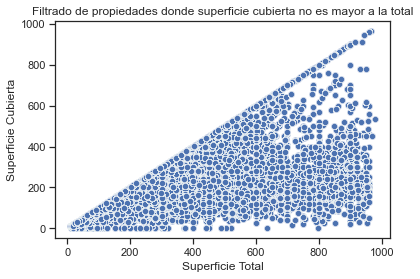

In [82]:
#filtered_data
#Se filtran las propiedades que tienen una superficie cubierta mayor a la superficie total.
dataset_clear = dataset_clear[dataset_clear['surface_covered_in_m2'] <= dataset_clear['surface_total_in_m2']]
sns.scatterplot(x="surface_total_in_m2", y="surface_covered_in_m2", data = dataset_clear)
plt.title('Filtrado de propiedades donde superficie cubierta no es mayor a la total')
plt.xlabel('Superficie Total')
plt.ylabel('Superficie Cubierta')
print("Cantidad de propiedades con superficie cubierta no mayor a la total",dataset_clear.shape)

In [83]:
#Se analiza si todos los tipos de moneda son en dólares
filtered_data['currency'].unique().tolist()

['USD', 'ARS', 'nan']

In [84]:
#separamos los datos por unicamente los USD 
data_USD_mask= filtered_data['currency']=='USD'
data_USD=filtered_data[data_USD_mask]
data_USD.head(2)
data_USD['currency'].unique().tolist()

['USD']

Text(0.5, 1.0, 'Cantidad de propiedades por precio')

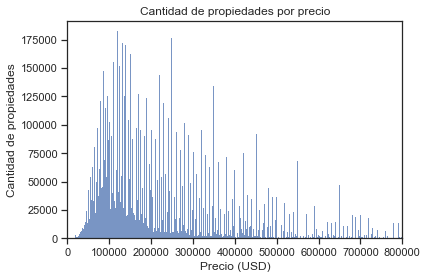

In [85]:
#Se analiza la distribución del precio
#La mayor cantidad de propiedades tienen un precio entre 100.000 y 200.000 
#Es poca la cantidad de propiedades que tienen precios mayores a 400.000
sns.histplot(data_USD['price']);
plt.xlim(0,800000)
plt.xlabel('Precio (USD)')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por precio')

Graficamos nuevamente con los datos sin los outliners

Text(0.5, 8.95999999999998, 'Superficie total')

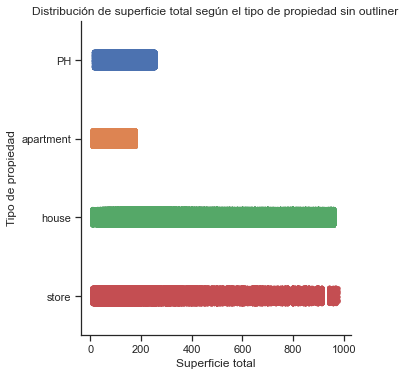

In [86]:
#Se grafica la distribución de la superficie total según los tipos de propiedades sin los outliners
sns.set_theme(style="ticks")
sns.catplot(data = dataset_clear, x = "surface_total_in_m2", y = "property_type")
plt.title('Distribución de superficie total según el tipo de propiedad sin outliner')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

C:\Users\fox00\AppData\Local\Temp\ipykernel_12400\1903285090.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


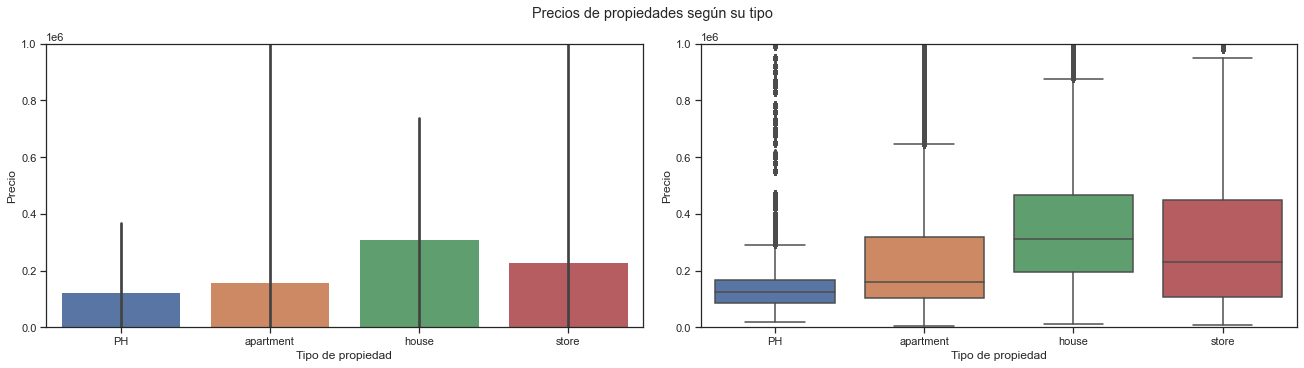

In [87]:
#Graficar la distribución del precio según el tipo de propiedad

fig, ax = plt.subplots(1,2, figsize=(18,5),constrained_layout = True)
sns.barplot(data = dataset_clear, x="property_type", y="price", estimator=np.median, ci='sd',ax=ax[0])
ax[0].set_xlabel('Tipo de propiedad')
ax[0].set_ylabel('Precio')
ax[0].set_ylim(0,1000000)
sns.boxplot(data = dataset_clear, x = 'property_type', y = 'price',ax=ax[1])
ax[1].set_xlabel('Tipo de propiedad')
ax[1].set_ylabel('Precio')
ax[1].set_ylim(0,1000000)
plt.suptitle("Precios de propiedades según su tipo")
fig.show()

In [88]:
#Filtrado de outliers basandonos en el tipo de propiedad

#Nuevos data set según el tipo de propiedad 
data_ph_clear = dataset_clear[dataset_clear["property_type"] == 'PH']
data_apartm_clear = dataset_clear[dataset_clear["property_type"] == 'apartment']
data_house_clear = dataset_clear[dataset_clear["property_type"] == 'house']
data_store_clear = dataset_clear[dataset_clear["property_type"] == 'store']
#Analizamos los valores maximos y minimos de cada dataset:
print("Valores de tipo de propiedad PH:")
get_iqr_values(data_ph_clear, 'price')
print("----------------------------------")
print("Valores de tipo de propiedad Apartment:")
get_iqr_values(data_apartm_clear, 'price')
print("----------------------------------")
print("Valores de tipo de propiedad house:")
get_iqr_values(data_house_clear, 'price')
print("----------------------------------")
print("Valores de tipo de propiedad Store:")
get_iqr_values(data_store_clear, 'price')

Valores de tipo de propiedad PH:
- Valor minimo: -39500.0
- Valor maximo: 292500.0
----------------------------------
Valores de tipo de propiedad Apartment:
- Valor minimo: -225000.0
- Valor maximo: 647000.0
----------------------------------
Valores de tipo de propiedad house:
- Valor minimo: -213000.0
- Valor maximo: 875000.0
----------------------------------
Valores de tipo de propiedad Store:
- Valor minimo: -412500.0
- Valor maximo: 967500.0


In [89]:
#Filtramos los data set según los valores maximos y minimos calculados anteriormente
#Los valores minimos al ser negativos, se filtran los mayores a 0
#Y se filtran los valores menores al valor máximo de cada tipo de propiedad.
print("Tamaño del data set con outliers en precio:", len(dataset_clear))
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo PH antes de eliminar outliers",data_ph_clear.shape)
new_data_ph_clear = data_ph_clear[(data_ph_clear['price'] <= 292500) & (data_ph_clear['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo PH después de eliminar outliers",new_data_ph_clear.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Depto antes de eliminar outliers",data_apartm_clear.shape)
new_data_apartm_clear = data_apartm_clear[(data_apartm_clear['price'] <= 647000) & (data_apartm_clear['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Depto después de eliminar outliers",new_data_apartm_clear.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Casa antes de eliminar outliers",data_house_clear.shape)
new_data_house_clear = data_house_clear[(data_house_clear['price'] <= 875000) & (data_house_clear['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Casa después de eliminar outliers",new_data_house_clear.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Casa antes de eliminar outliers",data_store_clear.shape)
new_data_store_clear = data_store_clear[(data_store_clear['price'] <= 967500) & (data_store_clear['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Casa después de eliminar outliers",new_data_store_clear.shape)

#long_ph_clear = len(new_data_ph_clear)
#long_apartm_clear = len(new_data_apartm_clear)
#long_house_clear = len(new_data_house_clear)
#long_store_clear = len(new_data_store_clear)

new_long_clear = len(new_data_ph_clear) + len(new_data_apartm_clear) + len(new_data_house_clear) + len(new_data_store_clear)
print("--------------------------------------------------------------------")
print("Tamaño del nuevo data set sin outliers en precio:", new_long_clear)

Tamaño del data set con outliers en precio: 8330542
--------------------------------------------------------------------
Cantidad de propiedades de tipo PH antes de eliminar outliers (353299, 6)
Cantidad de propiedades de tipo PH después de eliminar outliers (303230, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Depto antes de eliminar outliers (4552751, 6)
Cantidad de propiedades de tipo Depto después de eliminar outliers (3328730, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Casa antes de eliminar outliers (3219640, 6)
Cantidad de propiedades de tipo Casa después de eliminar outliers (2639427, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Casa antes de eliminar outliers (204852, 6)
Cantidad de propiedades de tipo Casa después de eliminar outliers (153192, 6)
------------------------------------------------------

Text(0.5, 8.95999999999998, 'Superficie total')

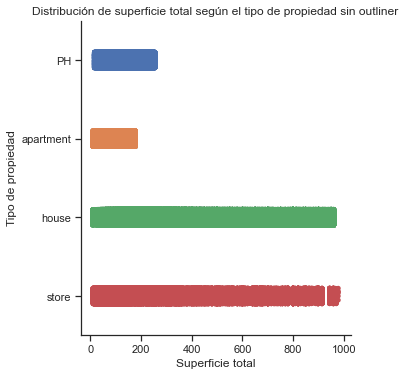

In [90]:
#Se grafica la distribución de la superficie total según los tipos de propiedades sin los outliners
sns.set_theme(style="ticks")
sns.catplot(data = dataset_clear, x = "surface_total_in_m2", y = "property_type")
plt.title('Distribución de superficie total según el tipo de propiedad sin outliner')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')